time series ends   2011-12-30


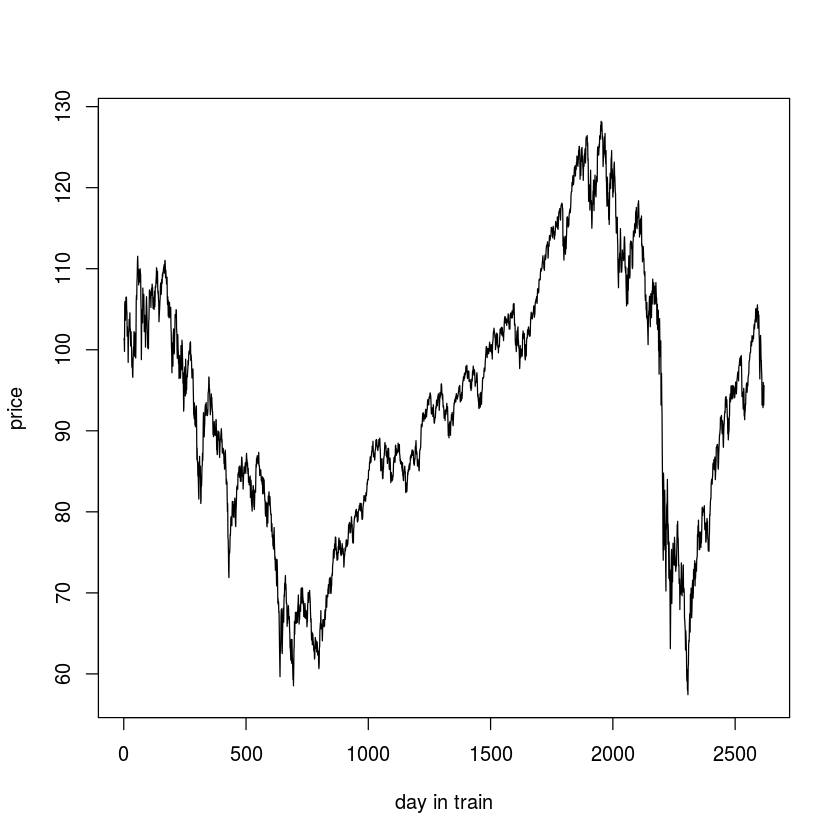

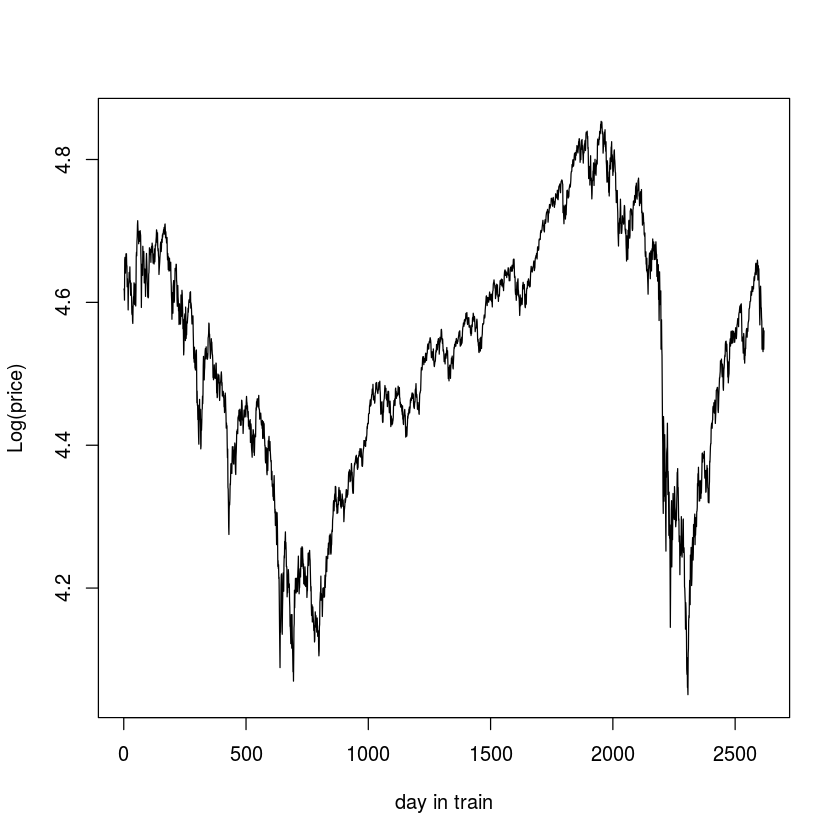

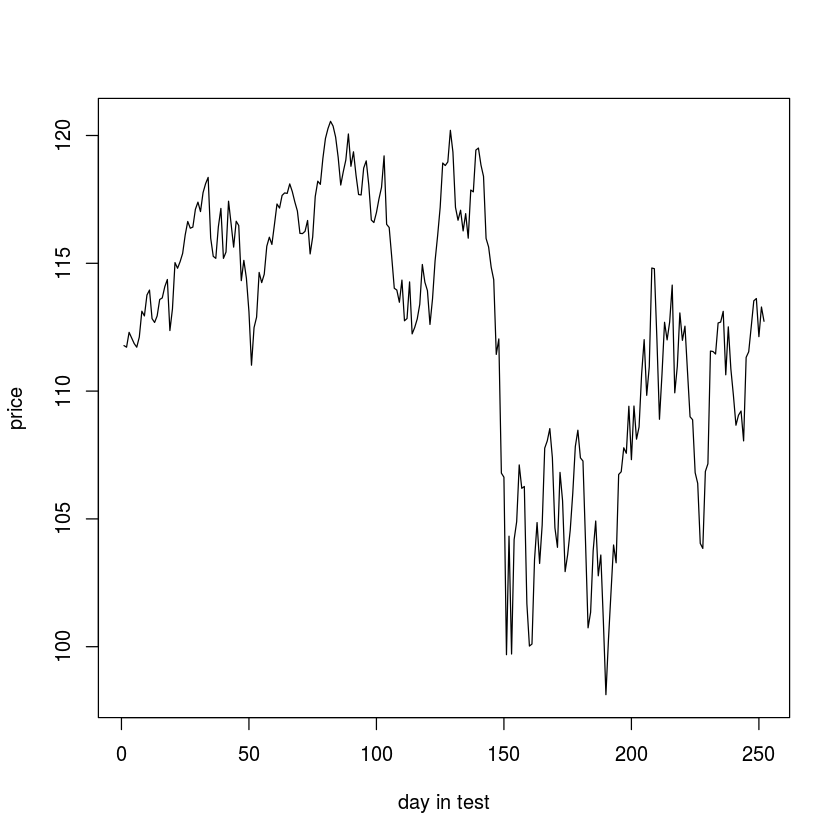

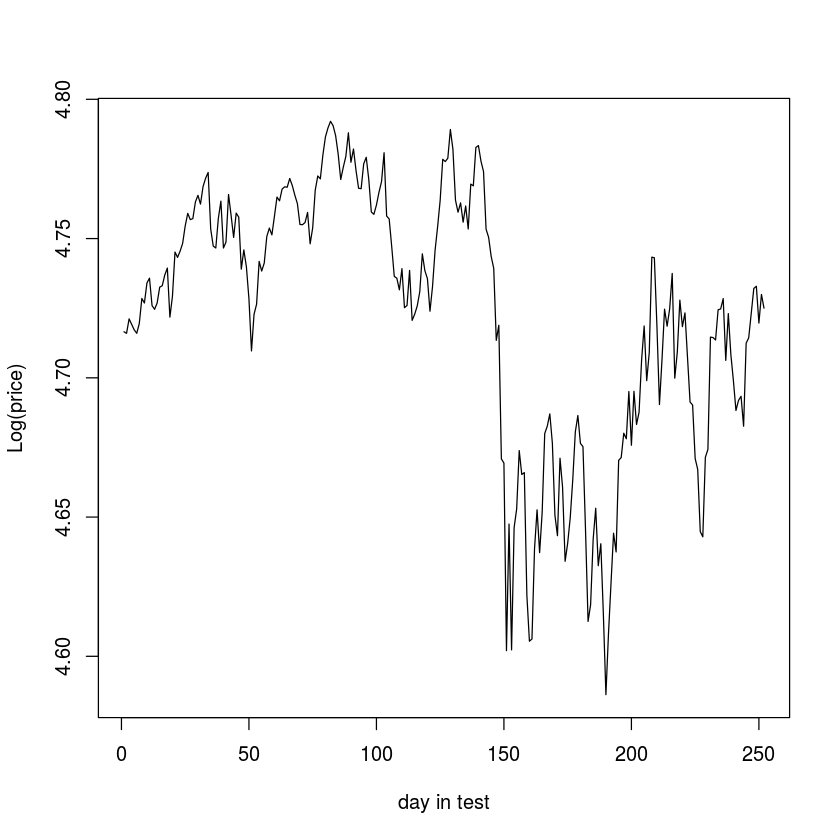

In [203]:
#install.packages('tseries')
#install.packages('CombMSC')
library(CombMSC)
library(tseries)
library(zoo)


spy = get.hist.quote(instrument = "SPY", "2000-01-04", "2011-12-31",quote = c("AdjClose"),
provider = c("yahoo"), method = NULL, compression = "d",
retclass = c("zoo"), quiet = FALSE, drop = FALSE)

#spy$train =ts(spy$train, frequency=7)

test_len = 400

spy = ts(coredata(spy), frequency = 1)
spy = splitTrainTest(spy, numTrain = length(spy) - test_len)
#spy$train
#spy$test

plot(spy$train,ylab='price', xlab='day in train')
plot(log(spy$train), ylab="Log(price)", xlab="day in train")

plot.ts(spy_test,ylab='price', xlab='day in test')
plot.ts(log(spy_test), ylab="Log(price)", xlab="day in test")


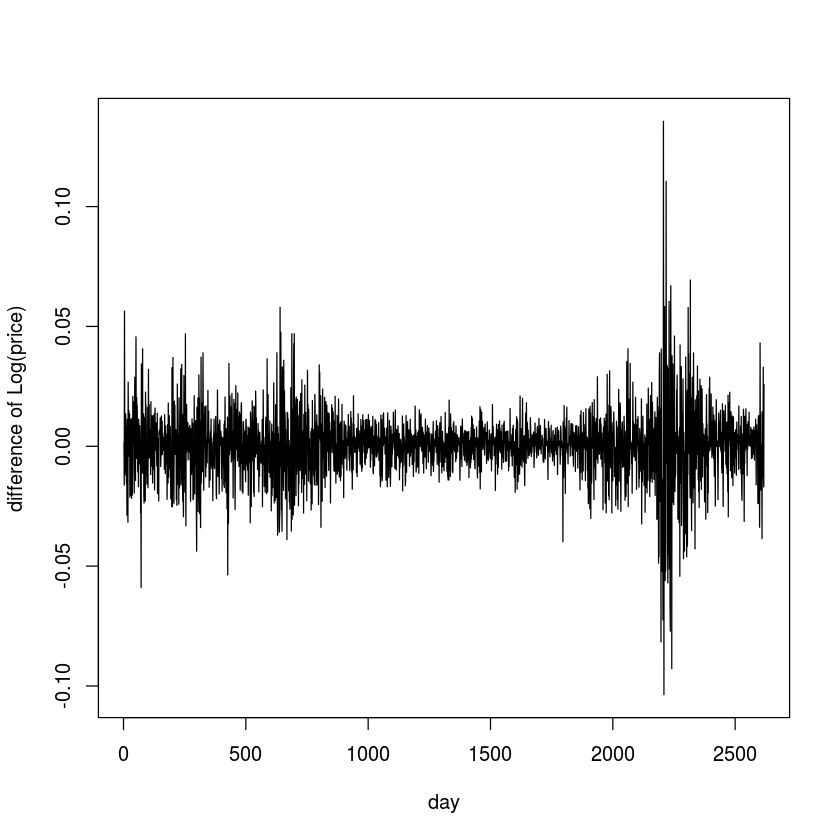

In [204]:
spy$train_log = log(spy$train)
spy$test_log = log(spy$test)


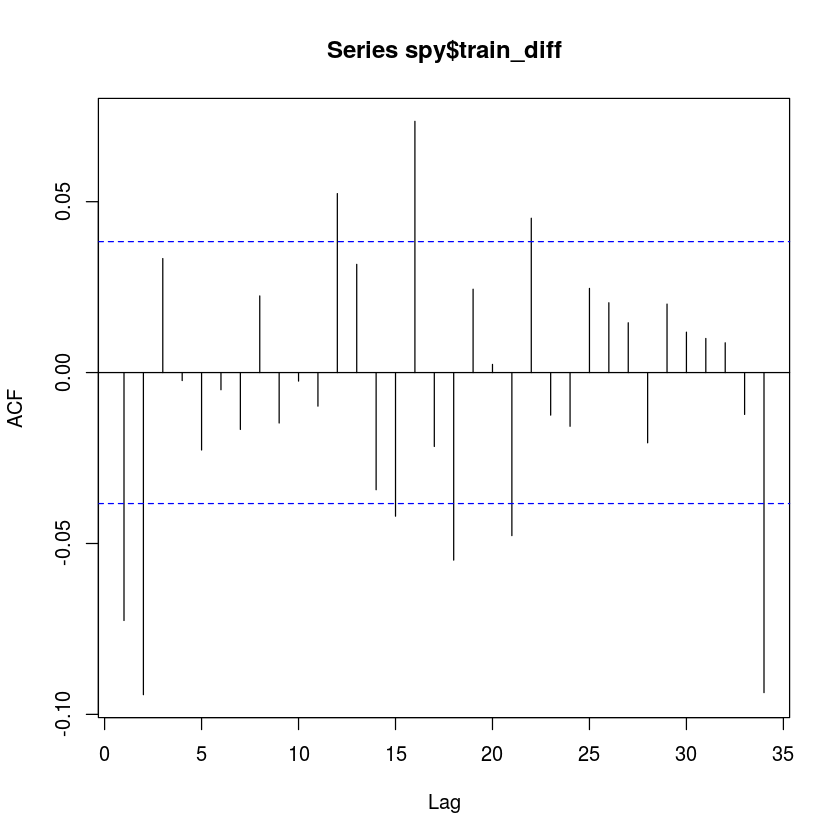

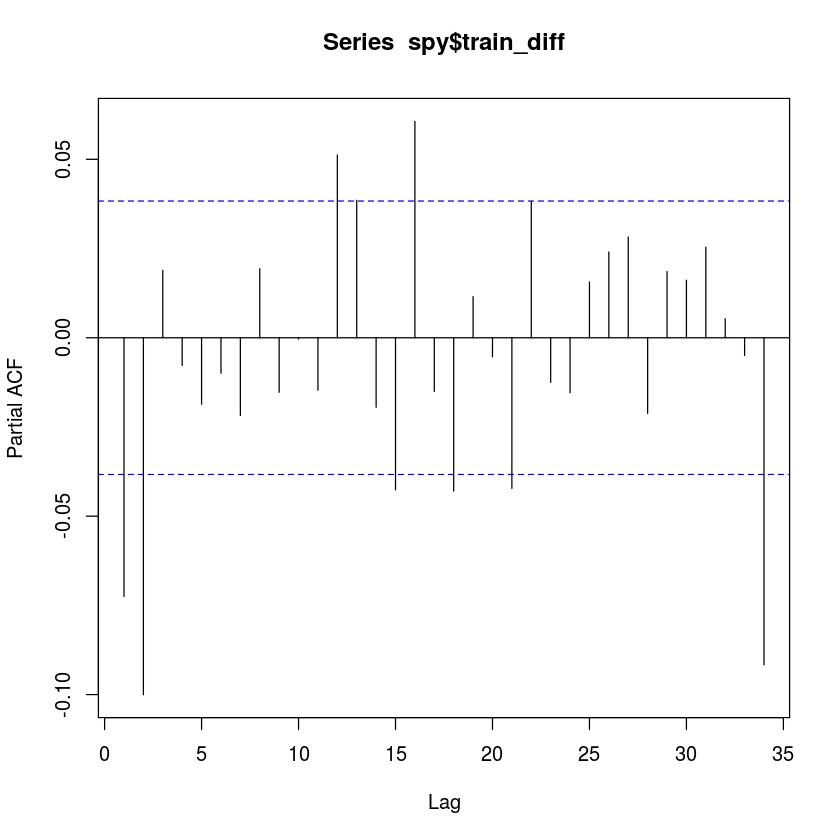

In [205]:
#adf.test(spy$train_diff)
acf(spy$train_diff, na.action= na.pass)
pacf(spy$train_diff, na.action= na.pass)

In [206]:
library(TSA)



eacf(spy$train_diff)

#spy$train_diff

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x o o o o o o o o o  x  o  o 
1 x x o o o o o o o o o  x  x  o 
2 x o o x o o o o o o o  o  o  o 
3 x o x o o o o o o o o  o  o  o 
4 x x x o x o o o o o o  o  o  o 
5 x x x x x o o o o o o  o  o  o 
6 x x x x x x o o o o o  o  o  o 
7 x o x x x x x o o o o  o  o  o 


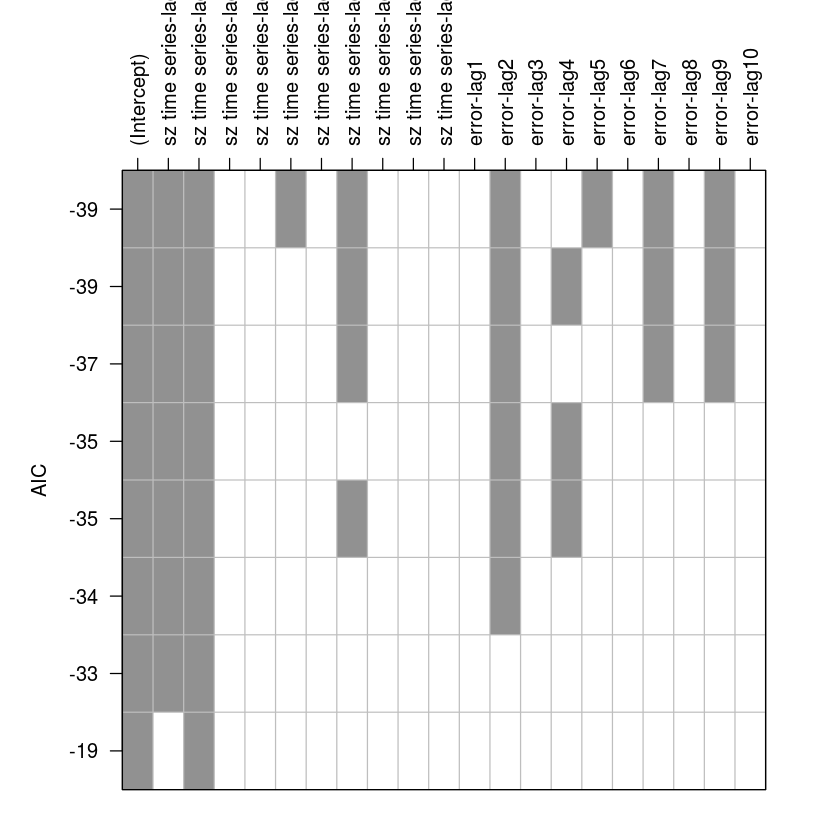

In [207]:
subsets = armasubsets(spy$train_diff, nar=10, nma=10, y.name = "sz time series", ar.method='ols' )
plot(subsets,scale = "AIC")

Series: spy$train_log 
ARIMA(2,1,1)                    

Coefficients:
          ar1      ar2     ma1
      -0.2752  -0.1142  0.1974
s.e.   0.1730   0.0213  0.1739

sigma^2 estimated as 0.000194:  log likelihood=7472.88
AIC=-14937.76   AICc=-14937.75   BIC=-14914.28

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-2.485531e-05,0.01391722,0.009426511,-0.001108696,0.2111146,0.9996686,-3.156144e-05,NA
Test set,1.195935e-01,0.14783872,0.126188688,2.523050120,2.6689824,13.3821372,9.889959e-01,13.24047


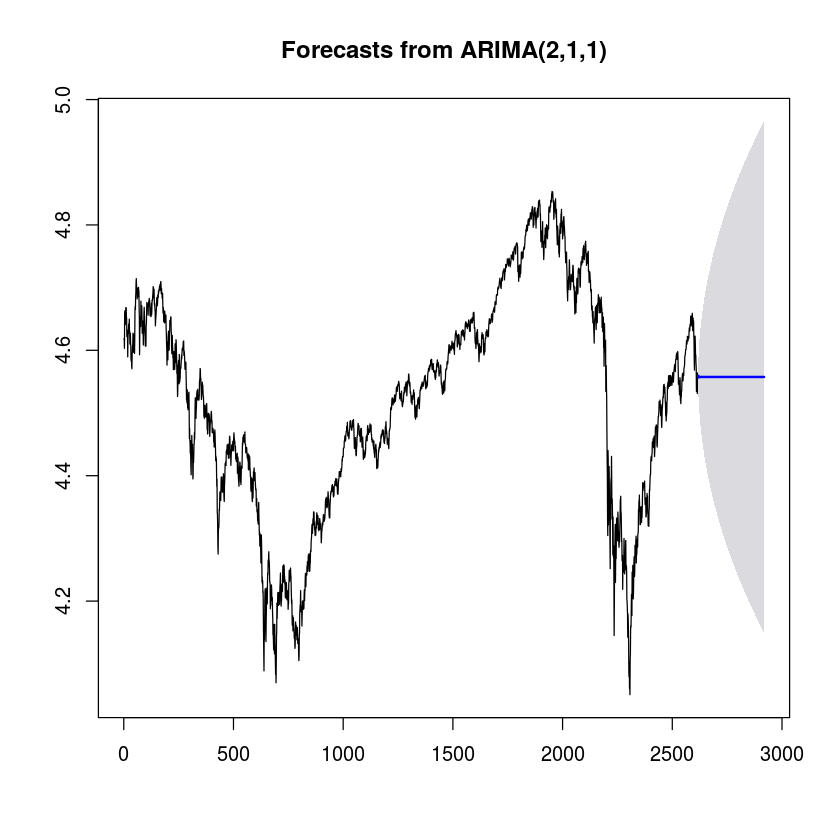

In [208]:
library(forecast)
fit1 = Arima(spy$train_log, order=c(2,1,1))
fit1


fit1_forecast = forecast(fit1, h=300,level=c(0.95))
accuracy(fit1_forecast, spy$test_log)
plot(fit1_forecast)

In [209]:
fit2 = Arima(spy$train_log, order=c(7,1,7))
fit2

accuracy(fit2, spy$test)
fit2_forecast = forecast(fit2, h=test_len,level=c(0.95))
accuracy(fit2_forecast, spy$test_log)
plot(fit2_forecast)

Series: spy$train_log 
ARIMA(7,1,7)                    

Coefficients:
         ar1     ar2      ar3     ar4      ar5      ar6     ar7      ma1
      0.1274  0.5405  -0.5226  0.6997  -0.2012  -0.8578  0.2097  -0.2095
s.e.  0.1715  0.0581   0.0923  0.0713   0.1077   0.0463  0.1469   0.1705
          ma2     ma3      ma4     ma5     ma6      ma7
      -0.5936  0.5819  -0.7333  0.2101  0.8873  -0.2933
s.e.   0.0540  0.1007   0.0680  0.1062  0.0439   0.1478

sigma^2 estimated as 0.0001925:  log likelihood=7488.35
AIC=-14946.7   AICc=-14946.51   BIC=-14858.65

ERROR: Error in testaccuracy(f, x, test, d, D): Unknown list structure


In [ ]:
fit3 = Arima(spy$train_log, order=c(9,1,0))
fit3

fit3_forecast = forecast(fit3, h=test_len,level=c(0.95))
accuracy(fit3_forecast, spy$test_log)
plot(fit3_forecast)

In [ ]:
fit4 = Arima(spy$train_log, order=c(0,1,9))
fit4

fit4_forecast = forecast(fit4, h=test_len,level=c(0.95))
accuracy(fit3_forecast, spy$test_log)
plot(fit4_forecast)

In [ ]:
McLeod.Li.test(y = spy$train_diff) # test if ARCH is reasonable



In [ ]:
shapiro.test(spy$train_diff) # test if the data's normality

In [ ]:
#install.packages('fBasics')
library(fBasics)

skewness(spy$train_diff) # testing for skewness
kurtosis(spy$train_diff)